In [1]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

Determinando visualmente as dimensões de um caractere.

In [2]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/imagens/CHMC-Braille.png", 0)

# 100 X 60
# img_box = img[:]
# img_box[50:150, 505] = 0
# img_box[50, 505:565] = 0
# img_box[50:150, 565] = 0
# img_box[150, 505:565] = 0
img = img[:,15:]
img_box = img[50:150, 490:550]
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14,4))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(img_box, cmap='gray')

TypeError: 'NoneType' object is not subscriptable

Percorrendo a imagem com uma box definida pelas dimensões encontradas.

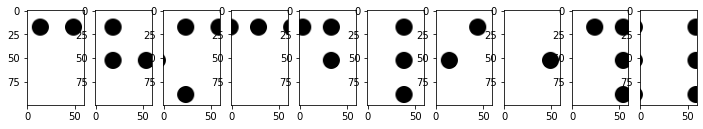

In [92]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(12,12))
larg = 60
alt = 100
for i in range(10):
    axs[i].imshow(img[50:50+alt, i*larg:(i+1)*larg], cmap='gray')
    

Encontrando o diâmetro de um ponto do caractere braille por meio da contagem de pixels com valor zero em cada linha da imagem binarizada.

Diâmetro do ponto: 18


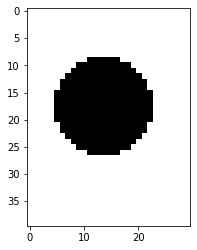

In [93]:
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ponto = img_bin[50:90,:30]
plt.imshow(ponto, cmap='gray')

cont = 0
diam = 0
for i in range(ponto.shape[0]):
    for j in range(ponto.shape[1]):
        if (ponto[i][j] == 0):
          cont += 1
    if (cont > diam):
        diam = cont
    cont = 0
print(f"Diâmetro do ponto: {diam}")

Utilizando a função cv2.findContours() da biblioteca OpenCV para determinar a posição de cada um dos pontos na imagem.

28

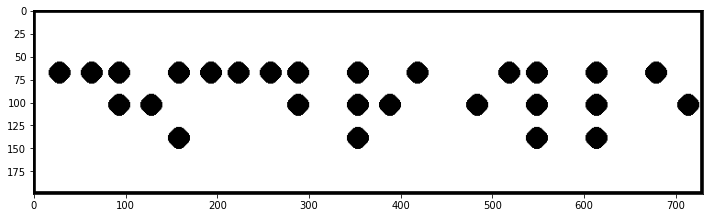

In [94]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/imagens/CHMC-Braille.png", 0)
# First Lvl Blur to Reduce Noise
blur = cv2.GaussianBlur(img,(3,3),0)
_,thres = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
# Adaptive Thresholding to define the  dots in Braille
# thres = cv2.adaptiveThreshold(
#         blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,5,4) 
# # Remove more Noise from the edges.
# blur2 = cv2.medianBlur(thres,3)
# # Sharpen again.
# ret2,th2 = cv2.threshold(blur2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # Remove more Noise.
# blur3 = cv2.GaussianBlur(th2,(3,3),0)
# # Final threshold
# ret3,th3 = cv2.threshold(blur3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(thres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')
len(contours)

Calculando o centro e o raio de cada disco dos caracteres braille

In [95]:
centers = []
radius_list = []
for contour in contours:
    (x,y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    centers.append(center)
    radius_list.append(round(radius))


Função que recebe um par de tuplas com as coordenadas de dois pontos e calcula a distância entre eles.


In [96]:
def dist_two_points(p1, p2):
    dist = int(math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2))
    return dist

Coordenadas do centro do ponto: (28, 67)
Raio: 10
Distância horizontal entre dois pontos de um mesmo caractere: 35


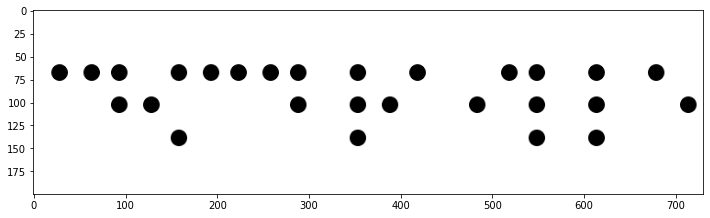

In [97]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/imagens/CHMC-Braille.png", 0)
plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')
print(f"Coordenadas do centro do ponto: {centers[-1]}")
print(f"Raio: {radius_list[-1]}")
print(f"Distância horizontal entre dois pontos de um mesmo caractere: ", end='')
print(dist_two_points(centers[-1], centers[-2]))

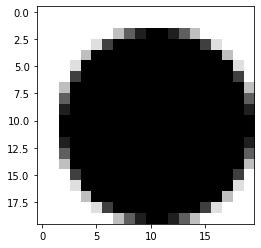

In [98]:
(x, y) = centers[1]
r = radius_list[1]
plt.imshow(img[y-r:y+r, x-r:x+r], cmap='gray')

Determinado a box do caractere braille por meio de seu ponto superior esquerdo

35


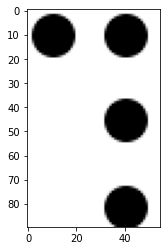

In [99]:
#plt.figure(figsize=(12,12))
c1 = centers[-1]
c2 = centers[-2]
dist1 = dist_two_points(c1, c2)
width = dist1 + 2*r
c1 = centers[-11] # 11º ponto da primeira linha
print(dist1)
plt.imshow(img[c1[1]-r:c1[1]+2*dist1+r,c1[0]-r:c1[0]+dist1+r], cmap='gray')

Determinando os pares de pontos horizontais que pertencem a um mesmo caractere

O ponto de centro (388, 102) e o ponto de centro (353, 102) pertecem ao mesmo caracter braille.
O ponto de centro (128, 102) e o ponto de centro (93, 102) pertecem ao mesmo caracter braille.
O ponto de centro (258, 67) e o ponto de centro (223, 67) pertecem ao mesmo caracter braille.
O ponto de centro (193, 67) e o ponto de centro (158, 67) pertecem ao mesmo caracter braille.
O ponto de centro (63, 67) e o ponto de centro (28, 67) pertecem ao mesmo caracter braille.


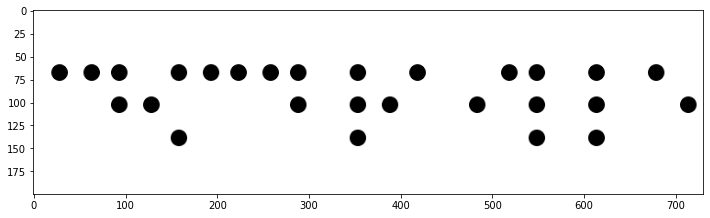

In [100]:
plt.figure(figsize=(12,12))
plt.imshow(img, cmap='gray')
no_repeat = 0
for i in range(1,len(centers)):
    for k in range(1,len(centers)):
        if (centers[i][1] == centers[k][1] and
            dist_two_points(centers[i],centers[k]) == 35 and i != no_repeat):
            no_repeat = k
            print(f"O ponto de centro {centers[i]} e o ponto de centro ", end='')
            print(f"{centers[k]} pertecem ao mesmo caracter braille.")
    

Determinando a quantidade de pixels com o valor zero em cada coluna.

In [120]:
height, width = img.shape
_,img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

cont = 0
hist = []
for x in range(width):
    for y in range(height):
        if (img_bin[y][x] == 0):
            cont += 1
    hist.append(cont)
    cont = 0
print(len(hist))
print(hist[548])

730
54


Plotando um histograma com a quantidade de pixels com o valor zero em cada coluna da imagem.

(0.0, 730.0)

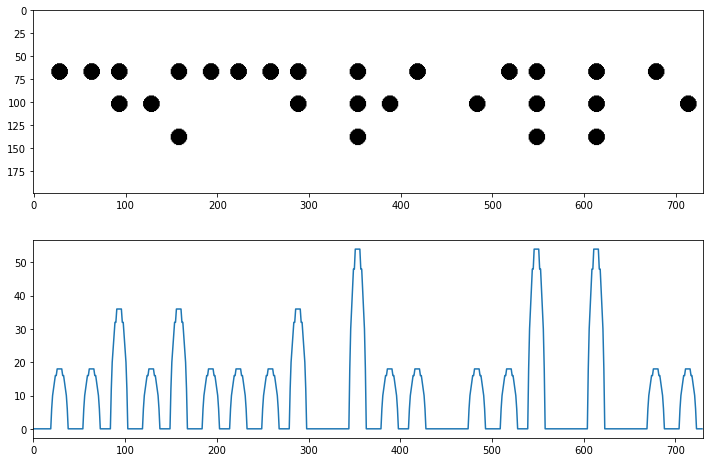

In [121]:
x = np.arange(len(hist))
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
axs[0].imshow(img_bin, cmap='gray')
axs[1].plot(x, hist)
axs[1].set_xlim(0,730)

Plotando o histograma e seu gradiente.

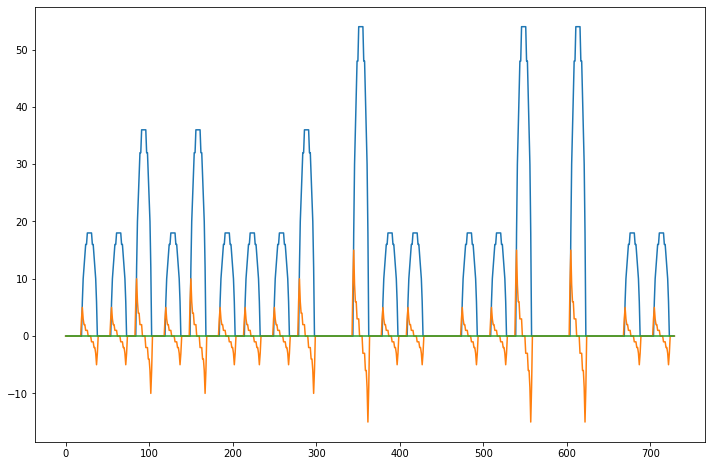

In [122]:
%matplotlib notebook
plt.figure(figsize=(12,8))
plt.plot(x, hist)
plt.plot(x, np.gradient(hist))
plt.plot(x, np.zeros(len(hist)))

Utilizando a função argrelextrema para calcular os máximos e mínimos locais da função gradiente do histograma. Com eles podemos determinar as coordenas horizontais de onde começa e onde termina cada ponto do caracter braille.

In [153]:
from scipy.signal import argrelextrema

gradient_hist = np.gradient(hist)

# Máximos locais
local_max = argrelextrema(gradient_hist, np.greater)[0]

# Mínimos locais
local_min = argrelextrema(gradient_hist, np.less)[0]

print(f"Máximos locais: {local_max}")
print(f"Mínimos locais: {local_min}")
print("Diâmetro dos pontos: ", end='')
for i in range(len(local_min)):
    print(local_min[i] - local_max[i], end=' ')

Máximos locais: [ 20  55  85 120 150 185 215 250 280 345 380 410 475 510 540 605 670 705]
Mínimos locais: [ 37  72 102 137 167 202 232 267 297 362 397 427 492 527 557 622 687 722]
Diâmetro dos pontos: 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 

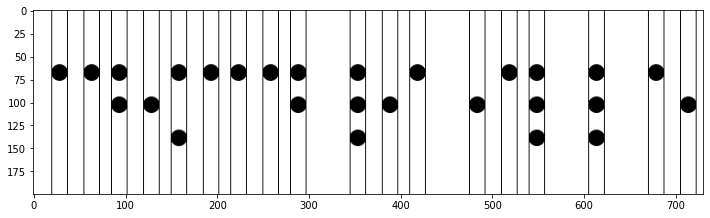

In [144]:
img_lines = img[:]
img_lines[:, 20] = 0

for line in local_max:
    img_lines[:, line] = 0

for line in local_min:
    img_lines[:, line] = 0

plt.figure(figsize=(12,12))
plt.imshow(img_lines, cmap='gray')